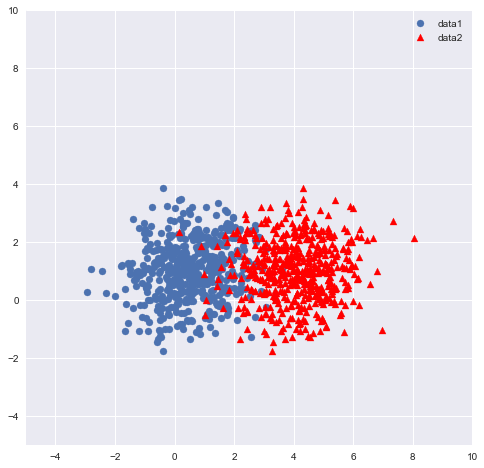

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.style.use('seaborn')
figsize = plt.figure(figsize=(8,8))
mean = np.array([1.0,0.5])
variance = np.array([[1.0,0.1],[0.1,1.2]])

mean1 = np.array([3,4])
variance1 = np.array([[1.21,0.1],[0.1,1.3]])

data1 = np.random.multivariate_normal(mean,variance,500)
data2 = np.random.multivariate_normal(mean1,variance1,500)
plt.scatter(data1[:,1],data1[:,0],label = 'data1')
plt.scatter(data2[:,1],data1[:,0],color = 'r',marker = '^',label = 'data2')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.legend()
plt.show()

# Logistic Regression Function 

[ 0.42548413  1.14005361 -2.94547669]


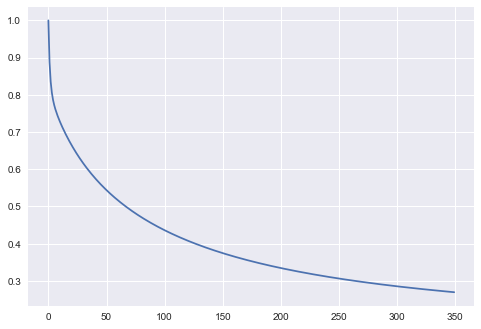

In [22]:
def hypothesis(X,theta):
    h = np.dot(X,theta)
    return sigmoid(h)
def sigmoid(h):
    exp = np.exp((-1)*h)
    term = 1+exp
    term = 1/term
    return term
def error(Y,X,theta):
    m = X.shape[0]
    err = 0.0
    for i in range(m):
        err += Y[i]*np.log2(hypothesis(X[i],theta))+(1-Y[i])*np.log2(1-hypothesis(X[i],theta))
    return -1*(err/m)
def gradient(X,Y,theta):
    a = X.shape[1]
    b = X.shape[0]
    grad = np.zeros(a)
    for i in range(b):
        for j in range(a):
            grad[j] = grad[j] + (Y[i]-hypothesis(X[i],theta))*X[i][j]
    return grad/b
def gradient_decent(X,Y,max_itr = 350,learning_rate = 0.1):
    
    n = X.shape[1]
    theta = np.zeros(n,)
    err = []
    for i in range(max_itr):
        er = error(Y,X,theta)
        err.append(er)
        grad = gradient(X,Y,theta)
        for j in range(n):
            theta[j] += learning_rate*(grad[j])
    
    return theta,err

def predict(x,theta):
    confidence = hypothesis(x,theta)
    if confidence<0.5:
        return 0
    else:
        return 1
def accuracy(x_test,y_test,theta):
    prediction = []
    for i in range(y_test.shape[0]):
        pred = predict(x_test[i],theta)
        prediction.append(pred)
    prediction = np.array(prediction)
    score = 0
    for i in range(y_test.shape[0]):
        if(y_test[i]==prediction[i]):
            score +=1
    acc = (score/y_test.shape[0])
    return float(acc)
l1 = data1.shape[0]
l2 = data2.shape[0]
Y1 = np.zeros((l1,1))
Y2 = np.ones((l2,1))
Y = np.concatenate((Y1,Y2),axis = 0)
X = np.concatenate((data1,data2),axis = 0)
m = X.shape[0]
arr = np.ones((m,1))
X = np.concatenate((X,arr),axis = 1)
from sklearn.utils import shuffle
X, Y = shuffle(X, Y, random_state=0)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 22)
theta,err = gradient_decent(x_train,y_train)
print(theta)
err = np.array(err)
plt.plot(err)

In [23]:
acc = accuracy(x_test,y_test,theta)
print(acc)

0.955


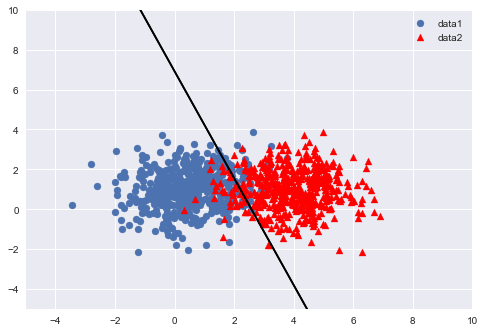

In [26]:
plt.scatter(data1[:,1],data1[:,0],label = 'data1')
plt.scatter(data2[:,1],data1[:,0],color = 'r',marker = '^',label = 'data2')
x = np.linspace(-4,8,10)
y = -(theta[1]*x + theta[2])/theta[0]
plt.plot(x,y,color='k')
plt.plot(x,y,color = 'black')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.legend()
plt.show()